# MCMC in Julia
## Assignment 1

### 1) Implement a Discrete Inverse Transform sampler for Poisson distribution.

In [55]:
pmf_poisson(n,λ) = (exp(-λ)*(BigInt(λ)^n))/factorial(BigInt(n))

function poisson_sample(λ)
    U = rand()
    
    i=0
    cum_distribution = pmf_poisson(i,λ)
    
    while U > cum_distribution
        i+=1
        cum_distribution += pmf_poisson(i,λ)
    end
    
    return i
end

poisson_sample (generic function with 1 method)

In [56]:
N = 20000
λ = 50 
#Taking the values for poisson's distribution

50

In [57]:
sample_vals = BigInt[]
mean_val = BigInt(0)

for i in 1:N
    a = poisson_sample(λ)
    push!(sample_vals,a)
    mean_val+= BigInt(a)
end
mean_val/=N


50.00914999999999999999999999999999999999999999999999999999999999999999999999988

In [58]:
variance = BigInt(0)
for j in sample_vals
    variance += (j-mean_val)^2
end
variance/=N

49.81126627750000000000000000000000000000000000000000000000000000000000000003484

In [59]:
println("Mean = ",mean_val)
println("Variance = ",variance)

Mean = 50.00914999999999999999999999999999999999999999999999999999999999999999999999988
Variance = 49.81126627750000000000000000000000000000000000000000000000000000000000000003484


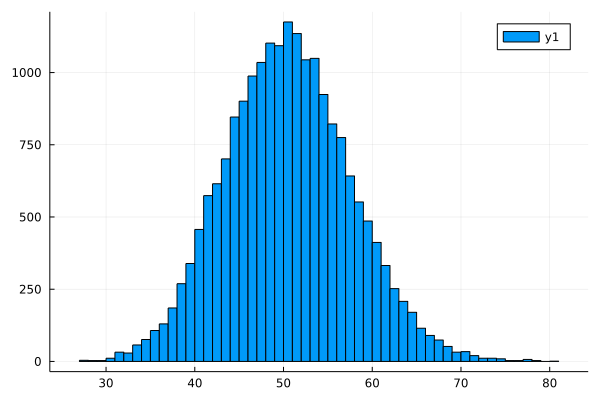

In [60]:
using Plots
q = histogram(sample_vals)
plot(q)